### Домашнее задание к лекции "Визуализация данных"
Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

Построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [240]:
df = pd.read_csv('results.csv')

In [241]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42084 non-null  object
 1   home_team   42084 non-null  object
 2   away_team   42084 non-null  object
 3   home_score  42084 non-null  int64 
 4   away_score  42084 non-null  int64 
 5   tournament  42084 non-null  object
 6   city        42084 non-null  object
 7   country     42084 non-null  object
 8   neutral     42084 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [243]:
def home_res(row):
    if row['home_score'] > row['away_score']:
        return 'W'
    elif row['home_score'] == row['away_score']:
        return 'D'
    else :
        return 'L'

df['home_res'] = df.apply(home_res, axis = 1)

In [244]:
def away_res(row):
    if row['home_score'] < row['away_score']:
        return 'W'
    elif row['home_score'] == row['away_score']:
        return 'D'
    else :
        return 'L'

df['away_res'] = df.apply(away_res, axis = 1)

In [245]:
def score_dif(row):
    return row['home_score'] - row['away_score']

df['score_dif'] = df.apply(score_dif, axis = 1)

In [246]:
def to_year(row):
    return row['date'][:4]

df['to_year'] = df.apply(to_year, axis = 1)

In [247]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_res,away_res,score_dif,to_year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,D,D,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,W,L,2,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,W,L,1,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,D,D,0,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,W,L,3,1876


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42084 non-null  object
 1   home_team   42084 non-null  object
 2   away_team   42084 non-null  object
 3   home_score  42084 non-null  int64 
 4   away_score  42084 non-null  int64 
 5   tournament  42084 non-null  object
 6   city        42084 non-null  object
 7   country     42084 non-null  object
 8   neutral     42084 non-null  bool  
 9   home_res    42084 non-null  object
 10  away_res    42084 non-null  object
 11  score_dif   42084 non-null  int64 
 12  to_year     42084 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 3.9+ MB


In [252]:
df = df[['home_team','away_team','home_score','away_score','tournament','home_res','city','away_res','score_dif','to_year']]

In [253]:
df['to_year'] = pd.to_numeric(df['to_year'], errors='coerce')

<ipython-input-253-523607e0c9ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['to_year'] = pd.to_numeric(df['to_year'], errors='coerce')


In [257]:
df = df [df.to_year >= 2000 ]

In [258]:
dynamics_by_year = df[['home_score', 'away_score', 'to_year']] \
    .groupby('to_year').sum()

([<matplotlib.axis.XTick at 0x1ac835d03d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

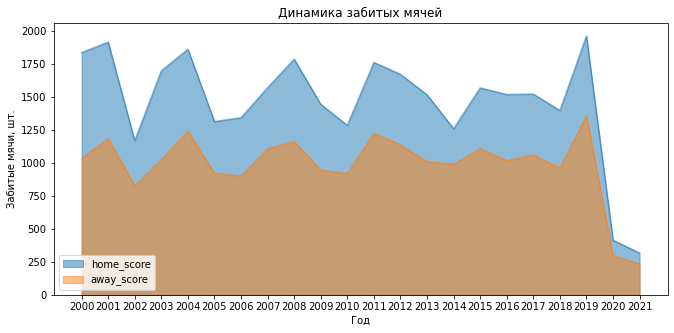

In [259]:
dynamics_by_year.plot(kind='area',
                             title='Динамика забитых мячей', 
                             xlabel='Год',
                             stacked=False,
                             ylabel='Забитые мячи, шт.')
plt.xticks(df['to_year'].unique())

Количество мячей, забитых сборными командами валово снижается в те года, когда проходит чемпионат мира по футболу (2002,/06/10/14/18)
При это пиковое количество мячей приходится на года, когда разыгрывается чемпионаты континентов по футболу. Вероятно за счет большего количества матчей в календарном году.
В 2020 году количество голов существуенно снижено за счет пандемии и отмены Чемпионата европы 2020.

In [260]:
df['total_score'] = df['home_score'] + df['away_score'] 

In [261]:
res = df.groupby('tournament').agg({'total_score':['sum']})
res.columns = ['sum_']
res.sort_values(by='sum_' , ascending = False ).head(15)

,sum_
tournament,
Friendly,17730
FIFA World Cup qualification,12259
UEFA Euro qualification,3571
African Cup of Nations qualification,2248
AFC Asian Cup qualification,1366
CFU Caribbean Cup qualification,1110
Island Games,978
CECAFA Cup,858
AFF Championship,840


<AxesSubplot:title={'center':'Platforms by Games'}, xlabel='Platforms', ylabel='Games quantity'>

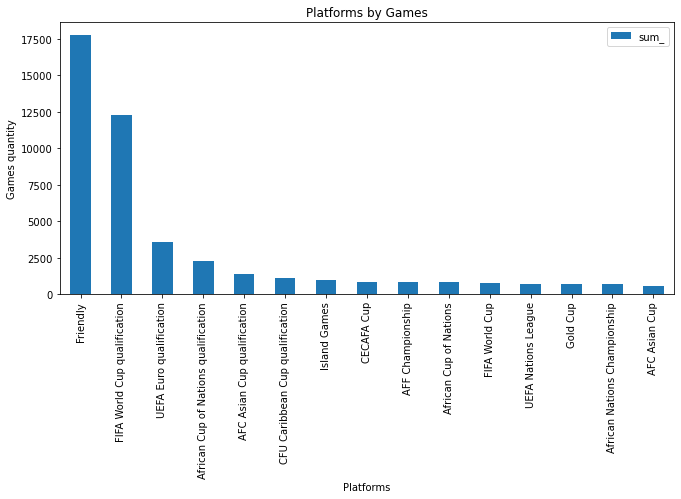

In [262]:
res.sort_values(by='sum_' , ascending = False ).head(15).plot(kind='bar', 
                   title='Platforms by Games',
                   xlabel='Platforms',
                   ylabel='Games quantity')

Наибольшее количество голов в 21 веке забито 
1. в товарещиских матчах. 
2. в отборочных матчах к чемпионатам мира
3. в отборочных матчах на чемпионат европы

Примечательно, что в матчах отборов на ЧМ забито достаточно много голов, учитывая, что играются эти матчи 2 года через 2, а товарищеские игры каждый год.

In [231]:
import random 
list_stran = list(set(list(df.home_team.unique() ) + list(df.away_team.unique())))
strana = list_stran[random.randint(1,len(list_stran))]
strana

'Netherlands'

In [232]:
info_home = df.loc[df['home_team'] == strana].groupby('tournament').agg(['count','sum'])['home_score'].reset_index()
info_home.columns = ['tournament', 'count_', 'sum_']
info_home.head()
info_away = df.loc[df['away_team'] == strana].groupby('tournament').agg(['count','sum'])['away_score'].reset_index()
info_away.columns = ['tournament', 'count_', 'sum_']
info_away.head()
all_games = pd.concat([info_home,info_away]).groupby('tournament').agg('sum')
all_games['avg_scores'] = all_games['sum_']/all_games['count_']
all_games = all_games['avg_scores'].sort_values()

<AxesSubplot:title={'center':'Среднее количество голов по турнирам команды Netherlands'}, ylabel='Турнир'>

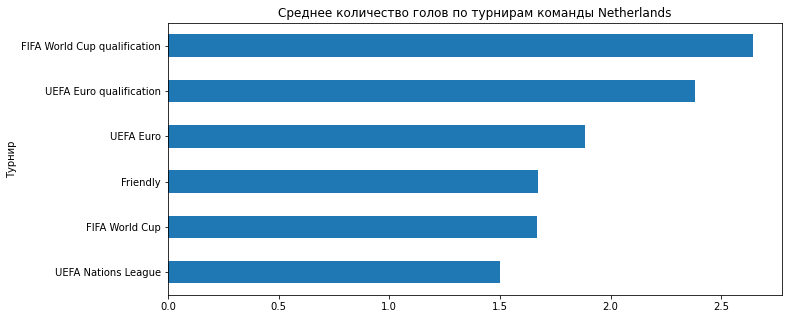

In [233]:
all_games.plot(kind='barh', 
                                                                  title='Среднее количество голов по турнирам команды '+strana,
                                                                  xlabel='Турнир',
                                                                  ylabel='Среднее кол-во голов')

В квалификации к чемпионату мира сборная Голландии забивае в среднем за матч больше 2,5 голов.
В лиге Наций коменда не так результативна, довольствуется в среднем 1,5 голами за матч.
Аналогичную статистику можно посмтреть по любой стране.

In [269]:
info_home = df.groupby('home_res').agg(['count'])['home_team']['count']

In [270]:
info_away = df.groupby('away_res').agg(['count'])['away_team']['count']

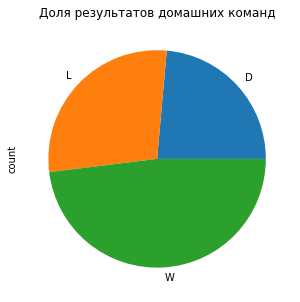

In [274]:
info_home.plot(kind='pie' ,title='Доля результатов домашних команд')
plt.show()

Как видно из графика, если команда играет дома, то чаще побеждает, почти в половине случаев.
Интересно, что % поражений дома чуть выше, чем ничейные исходы игр.